# Aula 07 - Probabilidade e simulação

## 7.1. Objetivos de aprendizagem

### 7.1.1. Básico

1. Entender que tipos de dado são melhor modelados para as diferentes distribuições de probabilidade:
    * Uniforme
    * Binomial
    * Normal
    * Poison
2. Gerar dados e desenhar gráficos gerados aleatoriamente para as distribuições apontadas
3. Utilizar o teste da hipótese nula nas distribuições trabalhadas
    * Teste binomial
    * t-test (1 amostra, amostras independentes e pareadas)
    * Correlação (pearson, kendall e spearman)
4. Definir os seguintes termos estatísticos
    * p-valor
    * alpha
    * power
    * _smallest effect size of interest_ (SESOI)
    * falso positivo
    * falso negativo
    * Intervalo de confianã (CI)
5. Calcular a potência utilizando iterações e uma função de amostragem

### 7.1.2. Intermediário

6. Gerar 3+ variáveis de uma distribuição normal multivariada e desenhá-los no gráfico

### 7.1.3. Avançado

7. Calcular o tamanho mínimo da amostra para um nível específico de potência e desenho

## 7.2. Recursos

* [Capítulo 21: interações](https://r4ds.had.co.nz/iteration.html) do livro _R for Data Science_
* Conhecimento básico de estatística

## 7.3. Ajustes

In [1]:
home <- path.expand("~")
lib_dir <- file.path(file.path(home, "R"), "lib")
dir.create(lib_dir, showWarnings = FALSE)

library(utils)
.libPaths(c(lib_dir, .libPaths()))

# libraries needed for these examples
install.packages("tidyverse")
library(tidyverse)
install.packages("MASS")
library(MASS)
devtools::install_github("debruine/faux")
library(faux)

set.seed(8675309) # makes sure random numbers are reproducible

Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/home/eduardo/R/lib’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




## 7.4. Distribuições

Simular dados é uma forma muito poderosa de testar seu conhecimento estatístico. As simulações vão repassar o básico sobre probabilidade.

### 7.4.1. Distribuição uniforme

A distribuição uniforme é a mais simples. Todos os números no intervalo possuem a mesma probabilidade de fazer parte da amostra.

### 7.4.1.1. Criando amostras para uma distribuição contínua

`runif(n, min=0, max=1)`

Utilize `runif()` para criar uma amostra de uma distribuição contínua.

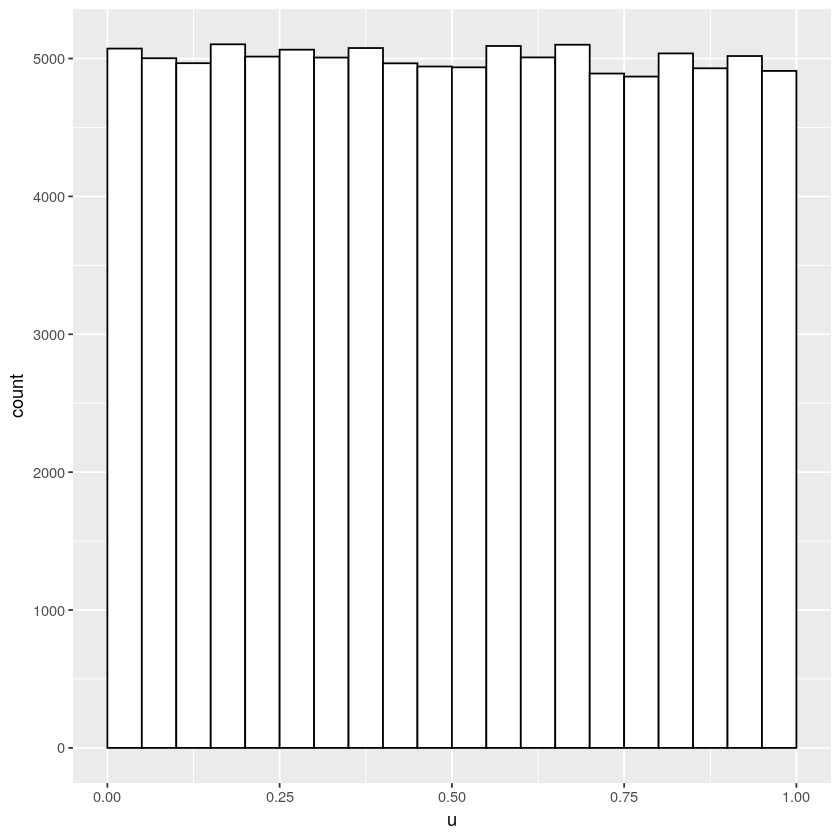

In [2]:
u <- runif(100000, min = 0, max = 1)

# plot to visualise
ggplot() + 
  geom_histogram(aes(u), binwidth = 0.05, boundary = 0,
                 fill = "white", colour = "black")

### 7.4.1.2. Criando amostras para uma distribuição discreta

`sample(x, size, replace = FALSE, prob = NULL)`

Utilize `sample()` para criar amostras para uma distribuição discreta. É possível utilizar a função para simular eventos discretos, como jogar um dado de 6 faces 1000 vezes. Ajustando o parâmetro `replace` para `TRUE` o evento é independente. Depois compare com os resultados se `replace` for `FALSE`.

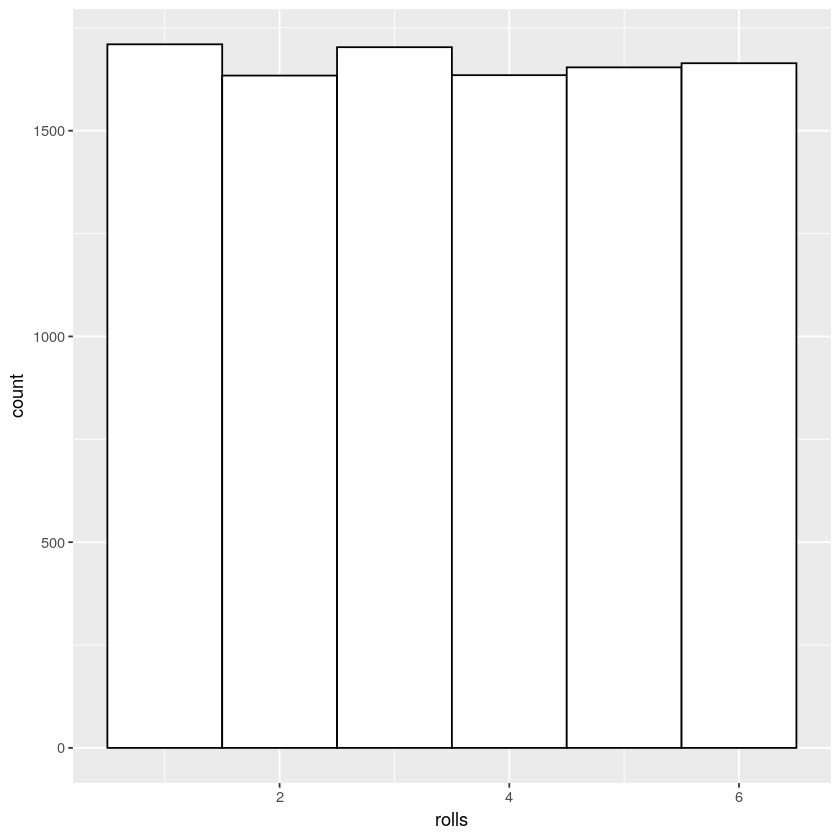

In [3]:
rolls <- sample(1:6, 10000, replace = TRUE)

# plot the results
ggplot() + 
  geom_histogram(aes(rolls), binwidth = 1, 
                 fill = "white", color = "black")

Também é possível utilizar `sample` em uma lista de saídas com nome.

In [4]:
pet_types <- c("cat", "dog", "ferret", "bird", "fish")
sample(pet_types, 10, replace = TRUE)

[1] "ferret" "bird"   "cat"    "dog"    "ferret" "cat"    "ferret" "ferret"
 [9] "ferret" "fish"

Furões ( _ferrets_ ) são muito menos comuns do que cães e gatos, o que torna a nossa amostra um pouco irreal. O argumento `prob` ajusta a probabilidade para cada um dos itens na lista.

In [5]:
pet_types <- c("cat", "dog", "ferret", "bird", "fish")
pet_prob <- c(0.3, 0.4, 0.1, 0.1, 0.1)
sample(pet_types, 10, replace = TRUE, prob = pet_prob)

[1] "ferret" "dog"    "ferret" "bird"   "dog"    "bird"   "cat"    "ferret"
 [9] "dog"    "dog"

### 7.4.2. Distribuição binomial

A distribuição binomial é utilizada para modelar dados binários, onde cada uma das observações pode ter apenas duas saídas, como verdadeiro/falso.

#### 7.4.2.1. Criando uma amostra para a distribuição

`rbinom(n, size, prob)`

A função `rbinom` gera uma distribuição binomial aleatória.

* `n` = número de observações
* `size` = número de julgamentos
* `prob` = probabilidade de sucesso em cada julgamento

Jogar uma moeda e obter cara ou coroa é um exemplo clássico d distribuição binomial, onde podemos atribuir 1 para cara ( _heads_ ) e 0 para coroa ( _tails_  ).

In [7]:
# 20 individual coin flips of a fair coin
rbinom(20, 1, 0.5)

[1] 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0

In [8]:
# 20 individual coin flips of a baised (0.75) coin
rbinom(20, 1, 0.75)

[1] 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0

Vamos gerar o total de caras em um conjunto de 20 amostras, ajustando `size` para 20 e `n` para 1.

In [9]:
rbinom(1, 20, 0.75)

[1] 16

É importante analisar sempre os dados gerados aleatoriamente para verificar se fazem sentido. Para grandes amostras, a visualização de gráficos pode auxiliar. A melhor forma de desenhar os dados é, normalmente, um histograma.

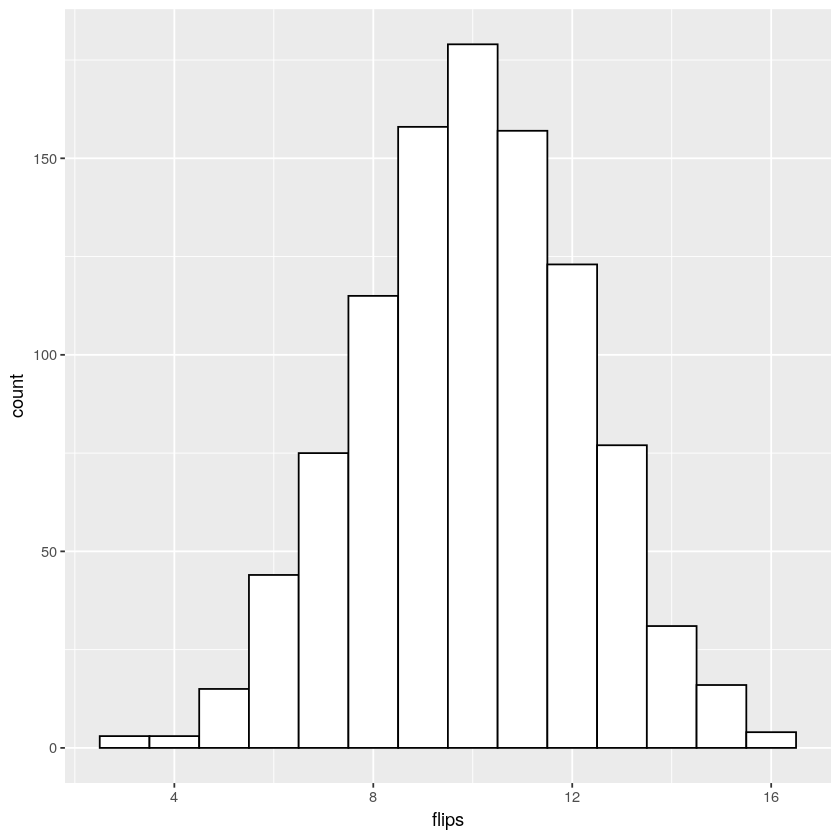

In [10]:
flips <- rbinom(1000, 20, 0.5)

ggplot() +
  geom_histogram(
    aes(flips), 
    binwidth = 1, 
    fill = "white", 
    color = "black"
  )

#### 7.4.2.2. Teste binomial exato

`binom.test(x, n, p)`

Uma distribuição binomial sempre pode ser testada em relação a uma distribuição de probabilidade normal utilizando o teste binomial exato.

* `x` = número de sucessos
* `n` = número de tentativas
* `p` = probabilidade de sucesso hipotética

Vamos testar com uma série de 10 jogadas de moeda de uma moeda corretamente ajustada contra uma viciada (com _bias_ ).

In [18]:
n <- 10
fair_coin <- rbinom(1, n, 0.5)
biased_coin <- rbinom(1, n, 0.6)

binom.test(fair_coin, n, p = 0.5)
binom.test(biased_coin, n, p = 0.5)


	Exact binomial test

data:  fair_coin and n
number of successes = 5, number of trials = 10, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.187086 0.812914
sample estimates:
probability of success 
                   0.5 



	Exact binomial test

data:  biased_coin and n
number of successes = 8, number of trials = 10, p-value = 0.1094
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4439045 0.9747893
sample estimates:
probability of success 
                   0.8 


Rode o código algumas vezes e observe os p-valores da moeda com vícios.

#### 7.4.2.3. Termos estatísticos

O **efeito** é alguma medida dos seus dados, que depende do tipo de dados utilizados e o teste estatístico que está sendo aplicado. Se jogamos a moeda 100 vezes e ela caiu no cara 66 vezes, o efeito é 66/100. O teste binominal exato é útil para comparar esse efeito com o **efeito nulo** que seria esperado para o teste de cara/coroa: 50/100. O **tamanho do efeito** se refere à diferença entre o efeito nos dados experimentais e o efeito nulo.

O **p-valor** de um teste é a probabilidade de ver um efeito no mínimo tão extremo quanto esse, se o efeito real for o valor contra o qual se está testando (efeito nulo). Assim, se um teste binomial for utilizado contra a probabilidade de 1/6 (a probabilidade de rodar um dos lados no dado de seis faces), então um p-valor de 0.17 significa que os efeitos esperados vão ser tão extremos quanto os dados fornecidos em pelo menos 17% dos casos.

Se estiver utilizando o teste de significância da hipótese nula (**NHST**) é necessário encontrar um valor de corte (**alpha**) para decidir rejeitar a hipótese nula. Os p-valores menores que alpha são chamados de **significantes**.

A probabilidade de um teste concluir que possui efeito quando na verdade não tem nenhum efeito (como concluir que uma moeda sem vícios está apresentando vícios) e chamada de **taxa de falso positivo**. O alpha é a taxa de falso positivo aceita para um teste. A probabilidade de um teste concluir que não tem efeito quando realmente tem (concluir que uma moeda viciada não tem vícios) é chamada de **taxa de falso negativo**. O **beta** é a taxa de falso aceita para um teste.

A **potência** é igual a 1 menos beta (**taxa de falso negativo**), e depende do tamanho do efeito, quantas amostras temos(n) e o valor ajustado para alpha. Para qualquer teste, se qualquer um desses valores não for especificado, é possível calcular o último. O tamanho do efeito no cálculo de potências deve ser o menor tamanho de interesse do efeito (**SESOI**).

O **intervalo de confiança** é um conjunto de valores ao redor de algum valor (como a média) que tem alguma probabilidade (normalmente 95%, mas é possível calcular para qualquer intervalo) de conter o parâmetro medido, se o processo for repetido muitas vezes.

#### 7.4.2.4.Função de amostragem

Para estimar as taxas é necessário repetir a amostragem. O desenvolvimento de uma função é o ideal para repetir exatamente o mesmo procedimento. Ajuste os argumentos da função para variáveis que podem ser alteradas. No exemplo a seguir desejamos estimar a potência:

* Tamanhos de amostra diferentes (`n`)
* Diferentes efeitos (`bias` ou vícios)
* Diferentes probabilidades (`p`, cujo padrão é 0.5

In [19]:
sim_binom_test <- function(n, bias, p = 0.5) {
  # simulate 1 coin flip n times with the specified bias
  coin <- rbinom(1, n, bias)
  # run a binomial test on the simulated data for the specified p
  btest <- binom.test(coin, n, p)
  # returun the p-value of this test
  btest$p.value
}

Após a criação da função vamos executar diferentes testes, alterando os parâmetros.

In [20]:
sim_binom_test(100, 0.6)

[1] 0.6172994

#### 7.4.2.5. Estimando a potência

Agora é possível utilizar a função `replicate()` para rodá-la quantas vezes forem necessárias e salvar todos os valores de saída. Para calcular a potência na sua análise verifique a proporção de valores da amostra que tenham um p-valor menor do que o alpha. O cálculo apresenta a probabilidade de rejeitar a hipótese nula quando ela for verdadeira.

In [21]:
my_reps <- replicate(1e4, sim_binom_test(100, 0.6))

alpha <- 0.05 # this does not always have to be 0.05

mean(my_reps < alpha)

[1] 0.4663

### 7.4.3. Distribuição normal

#### 7.4.3.1. Amostragem normal

`rnorm(n, mean, sd)`

Para simular uma distribuição normal de tamanho `n` é preciso conhecer a média (`mean`) e o desvio padrão (`sd`). Um gráfico de densidade é, normalmente, a melhor maneira de visualizar esse tipo de dados se `n` for grande o suficiente.

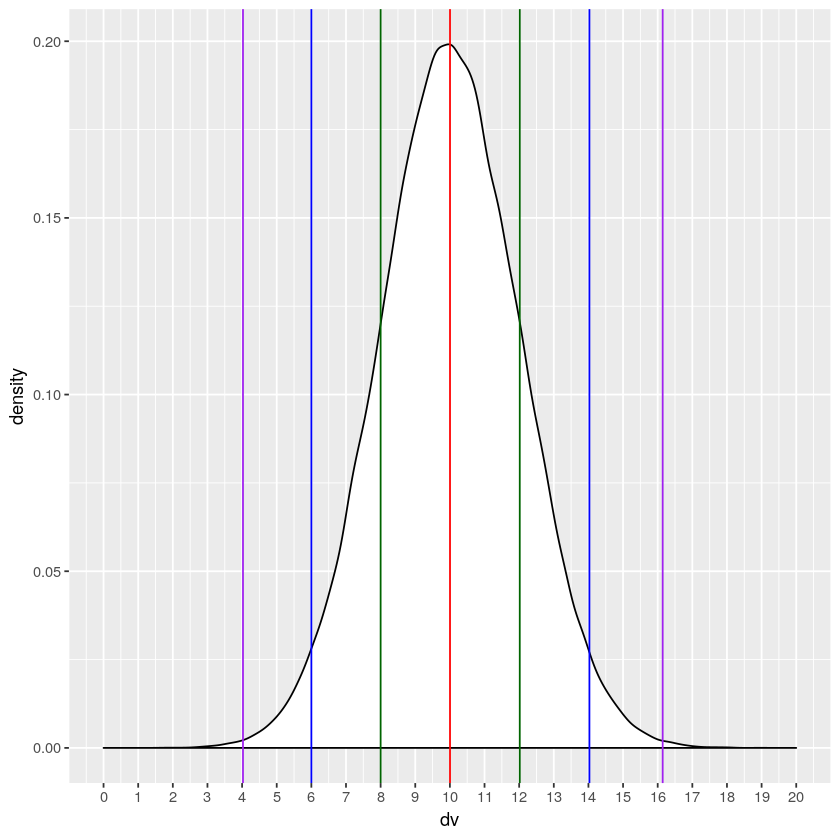

In [22]:
dv <- rnorm(1e5, 10, 2)

# proportions of normally-distributed data 
# within 1, 2, or 3 SD of the mean
sd1 <- .6827 
sd2 <- .9545
sd3 <- .9973

ggplot() +
  geom_density(aes(dv), fill = "white") +
  geom_vline(xintercept = mean(dv), color = "red") +
  geom_vline(xintercept = quantile(dv, .5 - sd1/2), color = "darkgreen") +
  geom_vline(xintercept = quantile(dv, .5 + sd1/2), color = "darkgreen") +
  geom_vline(xintercept = quantile(dv, .5 - sd2/2), color = "blue") +
  geom_vline(xintercept = quantile(dv, .5 + sd2/2), color = "blue") +
  geom_vline(xintercept = quantile(dv, .5 - sd3/2), color = "purple") +
  geom_vline(xintercept = quantile(dv, .5 + sd3/2), color = "purple") +
  scale_x_continuous(
    limits = c(0,20), 
    breaks = seq(0,20)
  )

Repita a execução e perceba as alterações no gráfico.

#### 7.4.3.2. T-test

`t.test(x, y, alternative, mu, paired)`

Utilize a função t-test para comparar a média de uma distribuição para uma hipótese nula (t-test de uma amostra), compare a média de duas amostras (t-test de amostras independentes) ou compare pares de valores (t-test de amostras pareadas).

Vamos rodar um t-test de uma amostra comparando a média dos seus dados com `mu`. Aqui utilizamos uma distribuição simulada com média de 0.5 e desvio padrão de 1, criando um efeito de 0.5 SD quando testado contra um `mu` de 0. Rode a simulação algumas vezes para verificar quantas vezes a função t-test returna um p-valor significante.

In [25]:
sim_norm <- rnorm(100, 0.5, 1)
t.test(sim_norm, mu = 0)


	One Sample t-test

data:  sim_norm
t = 5.8505, df = 99, p-value = 6.352e-08
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.3370598 0.6830264
sample estimates:
mean of x 
0.5100431 


Agora rodamos um t-test de amostras indepedentes comparando duas listas de valores.

a <- rnorm(100, 0.5, 1)
b <- rnorm(100, 0.7, 1)
t_ind <- t.test(a, b, paired = FALSE)
t_ind

#### 7.4.3.3. Função de amostragem

A função `names()` ajuda a encontrar os nomes de todos os parâmetros de t.test, para depois utilizá-los para recuperar um tipo de dados, como o teste `statistic` (t-valor).

In [28]:
names(t_ind)
t_ind$statistic

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

t 
-0.7581654

A função `broom::tidy()` converte a saída no tabela do tidy.

In [29]:
broom::tidy(t_ind)

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.1039714,0.7161166,0.820088,-0.7581654,0.4492563,197.3584,-0.3744103,0.1664675,Welch Two Sample t-test,two.sided


Se quiser rodar a simulação várias vezes guardando os dados para cada uma, primeiro transforme sua simulação em uma função.

In [30]:
sim_t_ind <- function(n, m1, sd1, m2, sd2) {
  # simulate v1
  v1 <- rnorm(n, m1, sd1)
  
  #simulate v2
  v2 <- rnorm(n, m2, sd2)
    
  # compare using an independent samples t-test
  t_ind <- t.test(v1, v2, paired = FALSE)
  
  # return the p-value
  return(t_ind$p.value)
}

Rode algumas vezes para garantir que os dados são sensíveis o suficiente.

In [34]:
sim_t_ind(100, 0.7, 1, 0.5, 1)

[1] 0.3687171

Agora replique a simulação 1000 vezes.

In [35]:
my_reps <- replicate(1e4, sim_t_ind(100, 0.7, 1, 0.5, 1))

alpha <- 0.05
power <- mean(my_reps < alpha)
power

[1] 0.2959

Compare sua simulação com os resultados da função `power.t.test()`. No caso, `delta` é a diferença entre `m1` e `m2`.

In [36]:
power.t.test(n = 100, delta = 0.2, sd = 1, sig.level = alpha, type = "two.sample")


     Two-sample t test power calculation 

              n = 100
          delta = 0.2
             sd = 1
      sig.level = 0.05
          power = 0.2902664
    alternative = two.sided

NOTE: n is number in *each* group


Vamos desenhar a distribuição de p-valores.

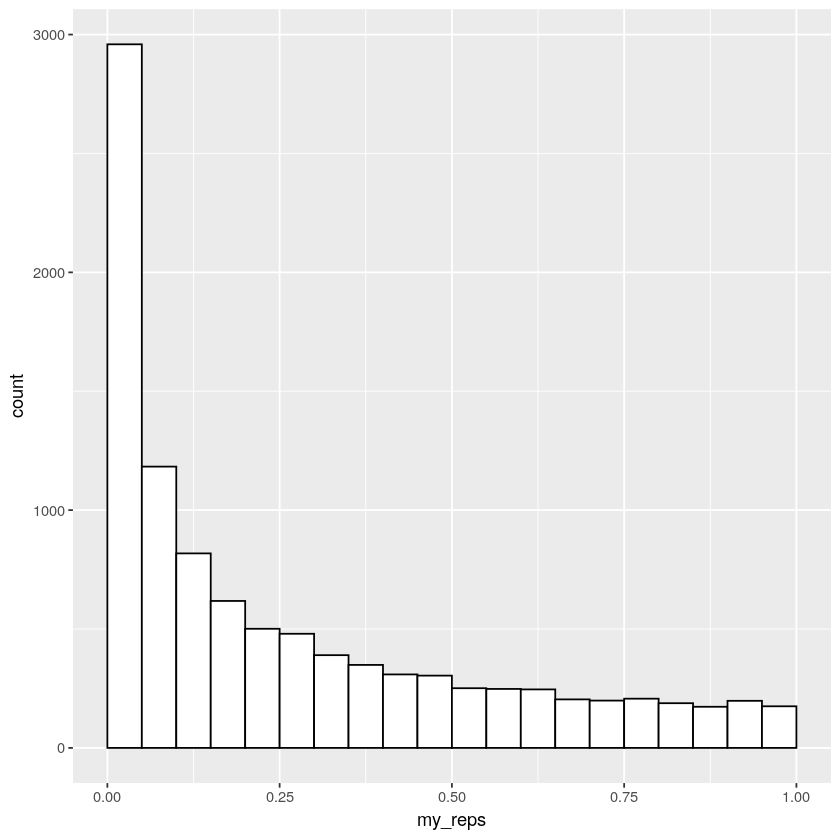

In [37]:
ggplot() + 
  geom_histogram(
    aes(my_reps), 
    binwidth = 0.05, 
    boundary = 0,
    fill = "white", 
    color = "black"
  )

### 7.4.4. Normal bivariada

#### 7.4.4.1. Correlação

É possível testar se duas variáveis contínuas são relacionadas utilizando a função `cor()`.

O exemplo abaixo apresenta uma forma de gerar duas variáveis correlacionadas: `a` é oriunda de uma distribuição normal, enquanto que `x` e `y` são a soma de outro valor oriund de uma distribuição normal. Mais tarde vai ser importante saber como gerar correlações em dados simulados.

In [38]:
n <- 100 # number of random samples

a <- rnorm(n, 0, 1)
x <- a + rnorm(n, 0, 1)
y <- a + rnorm(n, 0, 1)

cor(x, y)

[1] 0.5084163

`cor()` utiliza como padrão a correlação de Pearson. Ajuste o parâmetro `method` para utilizar as correlações de Kendall ou Spearman.

In [39]:
cor(x, y, method = "spearman")

[1] 0.4907531

#### 7.4.4.2. Distribuição de exemplo

Agora vamos criar amostras com relações específicas entre as variáveis, utilizando uma **distribuição bivariada normal** com `mvrnorm()` do pacote `MASS`.

In [40]:
n   <- 1000 # number of random samples
rho <- 0.5  # population correlation between the two variables

mu     <- c(10, 20) # the means of the samples
stdevs <- c(5, 6)   # the SDs of the samples

# correlation matrix
cor_mat <- matrix(c(  1, rho, 
                    rho,   1), 2) 

# create the covariance matrix
sigma <- (stdevs %*% t(stdevs)) * cor_mat

# sample from bivariate normal distribution
bvn <- MASS::mvrnorm(n, mu, sigma) 

cor(bvn) # check correlation matrix

1.0000000,0.5057226
0.5057226,1.0000000


Desenhe as variáveis da amostra no gráfico para garantir que tudo funcionou conforme o esperado. É mais fácil converter a saída de `mvnorm` em um tibble para utilizar no ggplot.

Warning message:
“`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session.”


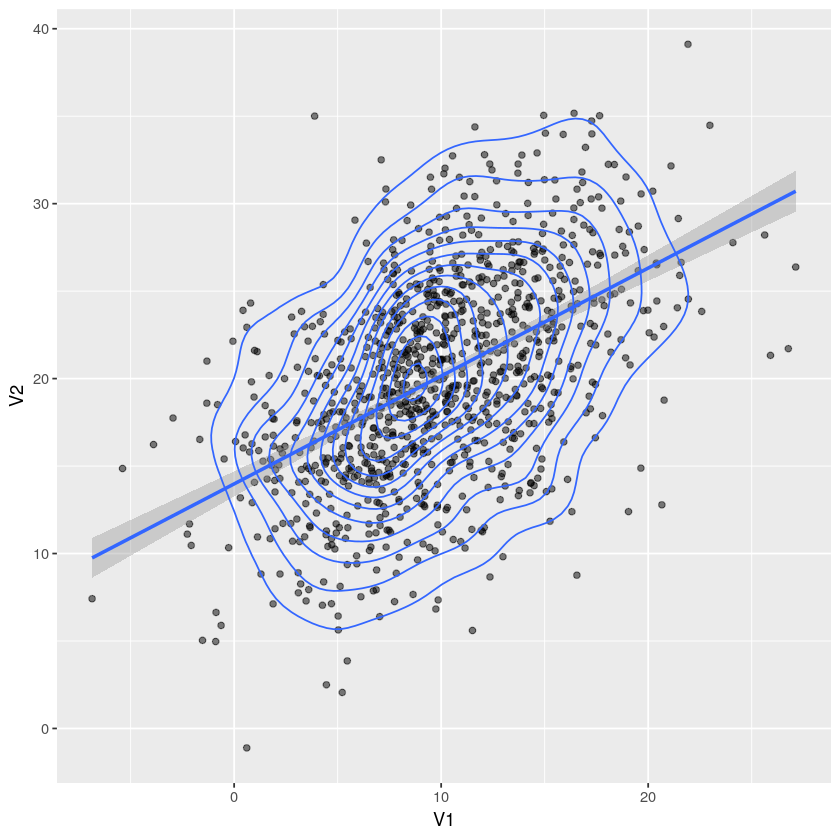

In [41]:
bvn %>%
  as_tibble() %>%
  ggplot(aes(V1, V2)) +
    geom_point(alpha = 0.5) + 
    geom_smooth(method = "lm") +
    geom_density2d()

### 7.4.5. Normal multivariada

É possível gerar o gráfico para mais de duas variáveis correlacionadas, mas é um pouco mais difícil criar  a matriz de correlação.

#### 7.4.5.1. Distribuição de exemplo

In [42]:
n      <- 200 # number of random samples
rho1_2 <- 0.5 # correlation betwen v1 and v2
rho1_3 <- 0   # correlation betwen v1 and v3
rho2_3 <- 0.7 # correlation betwen v2 and v3

mu     <- c(10, 20, 30) # the means of the samples
stdevs <- c(8, 9, 10)   # the SDs of the samples

# correlation matrix
cor_mat <- matrix(c(     1, rho1_2, rho1_3, 
                    rho1_2,      1, rho2_3,
                    rho1_3, rho2_3,      1), 3) 

sigma <- (stdevs %*% t(stdevs)) * cor_mat
bvn3 <- MASS::mvrnorm(n, mu, sigma)

cor(bvn3) # check correlation matrix

1.0000000,0.5512573,0.1153539
0.5512573,1.0000000,0.7037002
0.1153539,0.7037002,1.0000000


No ambiente de desenvolvimento é possível utilizar o pacote `faux` para gerar qualquer número de variáveis correlacionadas. O pacote também permite facilmente criar nomes para as variáveis e tem uma função para chegar os parâmetros dos novos dados simulados (`check_sim_stats()`).

In [45]:
library(faux)

bvn3 <- faux::rnorm_multi(
  n = n,
  vars = 3,
  mu = mu,
  sd = stdevs,
  r = c(rho1_2, rho1_3, rho2_3),
  varnames = c("A", "B", "C")
)

faux::check_sim_stats(bvn3)

n,var,A,B,C,mean,sd
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,A,1.00,0.52,-0.14,8.83,7.81
200,B,0.52,1.00,0.62,20.00,8.76
200,C,-0.14,0.62,1.00,31.13,9.32


#### 7.4.5.2. Gráficos 3D

Vamos utilizar a biblioteca `plotly` para criar um gráfico 3D.

In [48]:
library(plotly)

Execute o código no terminal do R. O Jupyter vai travar:

```
marker_style = list(
    color = "#ff0000", 
    line = list(
      color = "#444", 
      width = 1
    ), 
    opacity = 0.5,
    size = 5
  )

bvn3 %>%
  as_tibble() %>%
  plot_ly(x = ~A, y = ~B, z = ~C, marker = marker_style) %>%
  add_markers()
```

## 7.5. Exemplo

O exemplo a seguir utiliza os [gráficos de crescimento](https://www.cdc.gov/growthcharts/data/zscore/zstatage.csv) do [CDC dos EUA](https://www.cdc.gov/growthcharts/zscore.htm). Os dados contém tamanho em centímetros para os z-scores de –2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5 e 2 por sexo (1=masculino;2=feminino) a partir do meio mês de idade (24 a 240.5 meses).

### 7.5.1. Carga e limpeza

É preciso limpar os dados um pouco antes. Observe os dados após o import e altere o rótulo `Sex` para `male` e `female`, ao invés de `1` e `2`. Também faça a conversão de `Agemos` (idade em meses) para anos. Altere a coluna `0` como `mean` e calcule uma nova coluna com o `sd` como a diferença entre as colunas `1` e `0`.

In [49]:
orig_height_age <- read_csv("https://www.cdc.gov/growthcharts/data/zscore/zstatage.csv") 

Parsed with column specification:
cols(
  Sex = col_character(),
  Agemos = col_character(),
  `-2` = col_double(),
  `-1.5` = col_double(),
  `-1` = col_double(),
  `-0.5` = col_double(),
  `0` = col_double(),
  `0.5` = col_double(),
  `1` = col_double(),
  `1.5` = col_double(),
  `2` = col_double()
)



In [50]:
height_age <- orig_height_age %>%
  filter(Sex %in% c(1,2)) %>%
  mutate(
    sex = recode(Sex, "1" = "male", "2" = "female"),
    age = as.numeric(Agemos)/12,
    sd = `1` - `0`
  ) %>%
  dplyr::select(sex, age, mean = `0`, sd)

### 7.5.2. Gráfico

Desenhe no gráfico o novo dataset e verifique como a altura varia entre garotos e garotas.

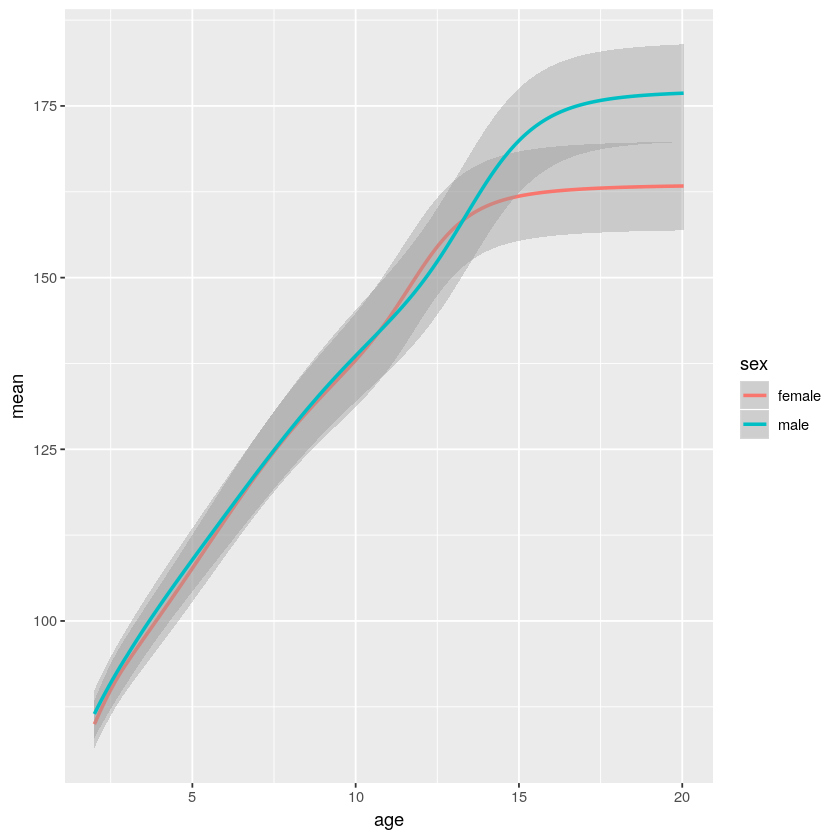

In [51]:
ggplot(height_age, aes(age, mean, color = sex)) +
  geom_smooth(aes(ymin = mean - sd, ymax = mean + sd), stat="identity")

### 7.5.3. Média e desvio padrão

Crie novas variáveis para as médias e desvios padrão para homens e mulheres de 20 anos de idade.

In [52]:
height_sub <- height_age %>% filter(age == 20)

m_mean <- height_sub %>% filter(sex == "male") %>% pull(mean)
m_sd   <- height_sub %>% filter(sex == "male") %>% pull(sd)
f_mean <- height_sub %>% filter(sex == "female") %>% pull(mean)
f_sd   <- height_sub %>% filter(sex == "female") %>% pull(sd)

height_sub

sex,age,mean,sd
<chr>,<dbl>,<dbl>,<dbl>
male,20,176.8492,7.115645
female,20,163.3383,6.460481


### 7.5.4. Simule uma população

Simule 50 valores de altura aleatórios para homens e para mulheres utilizando a função `rnorm()` e os parâmetros de média e desvio padrão acima. Desenhe um gráfico com os dados.

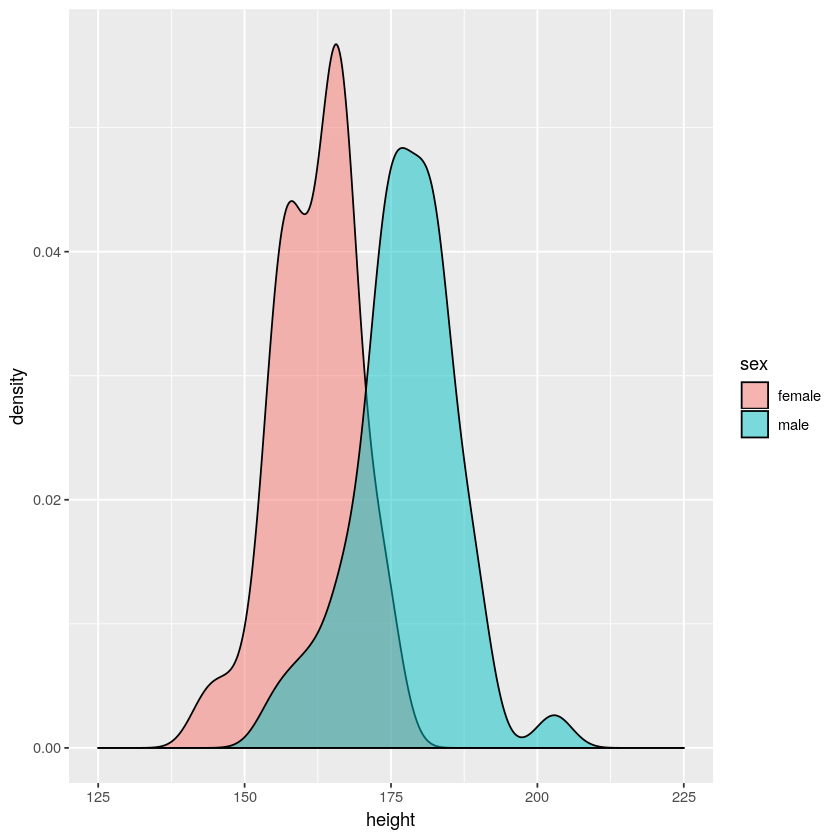

In [53]:
sim_height <- tibble(
  male = rnorm(50, m_mean, m_sd),
  female = rnorm(50, f_mean, f_sd)
) %>%
  gather("sex", "height", male:female)

ggplot(sim_height) +
  geom_density(aes(height, fill = sex), alpha = 0.5) +
  xlim(125, 225)

### 7.5.5. Analise os dados simulados

Utilize a função `sim_t_ind(n, m1, sd1, m2, sd2)` criada anteriormente para gerar uma simulação com uma amostra de tamanho 50 em cada grupo utilizando média e desvio padrão para sexo masculino e feminino de 14 anos.

In [54]:
height_sub <- height_age %>% filter(age == 14)
m_mean <- height_sub %>% filter(sex == "male") %>% pull(mean)
m_sd   <- height_sub %>% filter(sex == "male") %>% pull(sd)
f_mean <- height_sub %>% filter(sex == "female") %>% pull(mean)
f_sd   <- height_sub %>% filter(sex == "female") %>% pull(sd)

sim_t_ind(50, m_mean, m_sd, f_mean, f_sd)

[1] 0.01085526

### 7.5.6. Replique a simulação

Agora replicamos os valores 1e4 vezes utilizando a função `replicate()`. A função salvará os p-valores retornados na lista `my_reps`. Podemos então verifica a proporção dos p-valores que são menores que nosso alpha. Essa é a potência do teste.

In [55]:
my_reps <- replicate(1e4, sim_t_ind(50, m_mean, m_sd, f_mean, f_sd))

alpha <- 0.05
power <- mean(my_reps < alpha)
power

[1] 0.6512

### 7.5.7. Previsão de uma cauda

Os dados apresentados até o momento têm aproximadamente 65% de chance de detectar a diferença de altura entre os sexos com um teste de duas caudas. Modifique a função `sim_t_ind` para a previsão de uma cauda.

Seria possível apenas alterar o valor de `alternative` para _greather_ na função, mas é possível que seja melhor adicionar o parâmetro `alternative` à função (com o mesmo valor de `t.test`).

In [56]:
sim_t_ind <- function(n, m1, sd1, m2, sd2, alternative = "two.sided") {
  v1 <- rnorm(n, m1, sd1)
  v2 <- rnorm(n, m2, sd2)
  t_ind <- t.test(v1, v2, paired = FALSE, alternative = alternative)
  
  return(t_ind$p.value)
}

alpha <- 0.05
my_reps <- replicate(1e4, sim_t_ind(50, m_mean, m_sd, f_mean, f_sd, "greater"))
mean(my_reps < alpha)

[1] 0.7566

### 7.5.8. Tamanho do espaço amostral

Como aumentar a potência da amostra para 80%? Podemos aplicar tentativa e erro, já que sabemos que o número tem que ser maior do que 50. Contudo, também é possível repetir o cálculo da potência para um conjunto de amostras.

Comece com um pequeno número de cópias e/ou aumente as amostras para estimar onde a alteração deve ser feita. Assim é possível repetir o procedimento com diferentes conjuntos de amostras e iterações.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



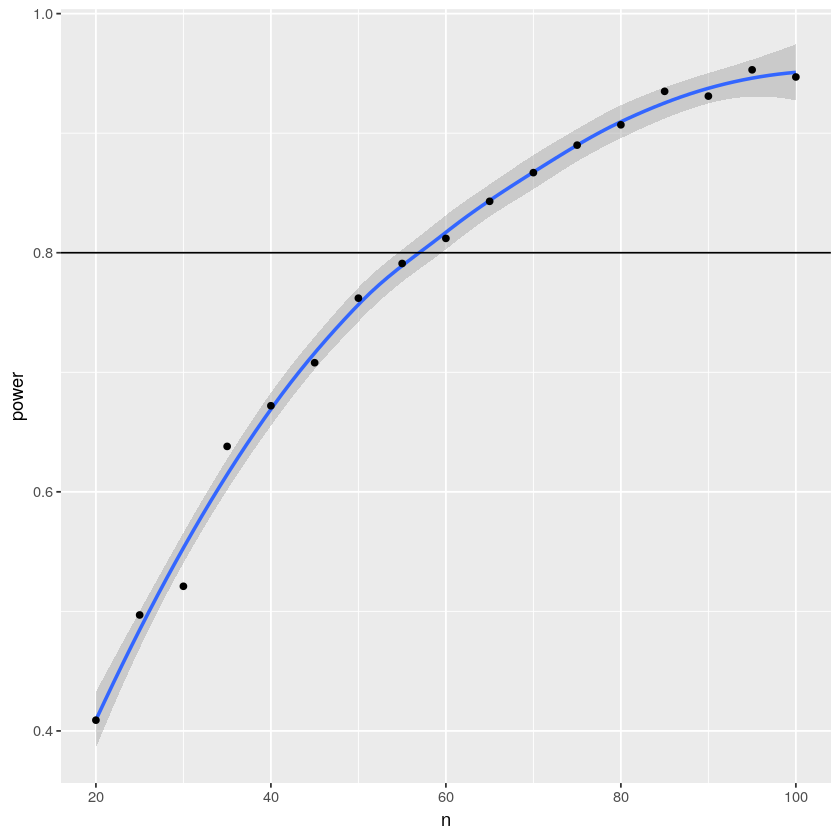

In [57]:
alpha <- 0.05
power_table <- tibble(
  n = seq(20, 100, by = 5)
) %>%
  mutate(power = map_dbl(n, function(n) {
    ps <- replicate(1e3, sim_t_ind(n, m_mean, m_sd, f_mean, f_sd, "greater"))
    mean(ps < alpha)
  }))

ggplot(power_table, aes(n, power)) +
  geom_smooth() +
  geom_point() +
  geom_hline(yintercept = 0.8)

Agora verificamos que o valor está proximo de 55 +- 5, e podemos aumentar o número de réplicas de 1e3 para 1e4.

In [58]:
power_table <- tibble(
  n = seq(50, 60)
) %>%
  mutate(power = map_dbl(n, function(n) {
    ps <- replicate(1e3, sim_t_ind(n, m_mean, m_sd, f_mean, f_sd, "greater"))
    mean(ps < alpha)
  }))

##ggplot(power_table, aes(n, power)) +
##  geom_smooth() +
##  geom_point() +
##  geom_hline(yintercept = 0.8) +
##  scale_x_continuous(breaks = sample_size)